# Intro to the Dataset and the Aim of the EDA
<img src="image.png" alt="walmart black friday sale EDA banner" style="width: 800px;"/>

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers

**Dataset**

This dataset contains transactional data of customers who purchased products from the Walmart Stores during Black Friday

**Aim:** To analyze relationship of purchase amount against customer features, with added importance to gender

**Methods and Techniques used:** EDA and Central Limit Theorem

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount

What good looks like?

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
Give recommendations and action items to Walmart.
Evaluation Criteria

Defining Problem Statement and Analyzing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
Non-Graphical Analysis: Value counts and unique attributes ​
Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots
Missing Value & Outlier Detection (10 Points)
Business Insights based on Non- Graphical and Visual Analysis (10 Points)
Comments on the range of attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plot
Answering questions (50 Points)
Are women spending more money per transaction than men? Why or Why not? (10 Points)
Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
Results when the same activity is performed for Married vs Unmarried (10 Points)
Results when the same activity is performed for Age (10 Points)
Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Comments on different variables when generalizing it for Population
Recommendations (10 Points)
Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

## Library Setup

In [233]:
# Scientific libraries
import numpy as np
import pandas as pd

# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Helper libraries
from tqdm.notebook import tqdm, trange # Progress bar
#from colorama import Fore, Back, Style # coloured text in output
import warnings 
#warnings.filterwarnings('ignore') # ignore all warkings

# Visual setup
%config InlineBackend.figure_format = 'retina' # sets the figure format to 'retina' for high-resolution displays.

# Pandas options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # display all interaction 

# Table styles
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80"), ("text-transform", "capitalize")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}

# Seed value for numpy.random
np.random.seed(18)

## Read the Dataset

In [124]:
wm_df = pd.read_csv('walmart_data.csv')
wm_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Basic Exploration and Data wrangling 
##  Basic Exploration

In [125]:
wm_df.info()
wm_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


### Understanding the Dataset
Column                     | Description                          | Expected Data Type
---------------------------|--------------------------------------|-------------------
User_ID                    | Unique ID for user                   | int64
Product_ID                 | Unique ID for product                | str / object
Gender                     | Male / Female                        | Category
Age                        | Age groups                           | Category
Occupation                 | Unique code                          | Category
City_Category              | A,B,C                                | Category
Stay_In_Current_City_Years | Number of years stay in current city | Category
Marital_Status             | 0/1                                  | Category
Product_Category           | Unique code                          | Category
Purchase                   | Amount                               | int64

## Data wrangling

**Basic sanity and preparation**
* Renamed columns to snake_case

In [126]:
wm_df.rename(lambda x: x.lower(), axis='columns', inplace=True)
wm_df

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**Data Integrity and Consistency**
- Uniformity Constraint: Checked all data if in same unit or format like date, currency, scales
- Data Type Constraint: Converted all category like variables to category data type with order specified
- Data Range Constraints: No -ve values should be there in `purchases`
- Uniqueness Constraint: `product id`, `user_id` should not be duplicated
- Categorical Constraint: All categorical variables are ordered and no scope of collapsing because of similar name or very low in count for specific categories
- Reduced size of DF to 16.3 MB from 42 MB

In [127]:
# Data Type Constraint
wm_df['gender'] = pd.Categorical(wm_df['gender'], ordered=True, categories=['M', 'F'])
wm_df['age'] = pd.Categorical(wm_df['age'], ordered=True, categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
wm_df['marital_status'] = pd.Categorical(wm_df['marital_status'], ordered=True, categories=[0, 1])
wm_df['city_category'] = pd.Categorical(wm_df['city_category'], ordered=True, categories=['A', 'B', 'C'])
wm_df['occupation'] = pd.Categorical(wm_df['occupation'], ordered=True, categories=[x for x in range(0, 21)])
wm_df['stay_in_current_city_years'] = pd.Categorical(wm_df['stay_in_current_city_years'], ordered=True, categories=['0', '1', '2', '3', '4+'])
wm_df['product_category'] = pd.Categorical(wm_df['product_category'], ordered=True, categories=[x for x in range(1, 21)])
wm_df.info() # reduced size to 16.3 MB from 42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   user_id                     550068 non-null  int64   
 1   product_id                  550068 non-null  object  
 2   gender                      550068 non-null  category
 3   age                         550068 non-null  category
 4   occupation                  550068 non-null  category
 5   city_category               550068 non-null  category
 6   stay_in_current_city_years  550068 non-null  category
 7   marital_status              550068 non-null  category
 8   product_category            550068 non-null  category
 9   purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


In [128]:
# Data range constrain
wm_df[wm_df['purchase'].lt(0)]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase


In [129]:
# Categorical Constraint: 
for col in wm_df.select_dtypes('category').columns:
    wm_df[col].value_counts()

gender
M    414259
F    135809
Name: count, dtype: int64

age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

city_category
B    231173
C    171175
A    147720
Name: count, dtype: int64

stay_in_current_city_years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

marital_status
0    324731
1    225337
Name: count, dtype: int64

product_category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

**Data Validation and Relationships**

- Cross-Field Validation: User with `age` 0-17 and `marital_status` = 1 is not possible legally
- Hierarchical Validation: Same `product_id` can't be mapped to different `product_categories`. `product_categories` to `product_id` should be one to many relationship

In [130]:
# Cross-Field Validation
wm_df[(wm_df['age'] == '0-17') & (wm_df['marital_status'] == 1)]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase


In [131]:
# Hierarchical Validation
# same product_id can't be mapped to different product_categories
print(wm_df.groupby(['product_category', 'product_id'],observed=False)['product_id'].nunique().sum())

print(wm_df['product_id'].nunique())

3631
3631


**Data Quality and Cleansing**
- Handling Missing Data: No missing data
- Handling Outliers: No extreme outliers which can influence on our analysis:

In [132]:
# Handling Missing Data
wm_df.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   user_id                     550068 non-null  int64   
 1   product_id                  550068 non-null  object  
 2   gender                      550068 non-null  category
 3   age                         550068 non-null  category
 4   occupation                  550068 non-null  category
 5   city_category               550068 non-null  category
 6   stay_in_current_city_years  550068 non-null  category
 7   marital_status              550068 non-null  category
 8   product_category            550068 non-null  category
 9   purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


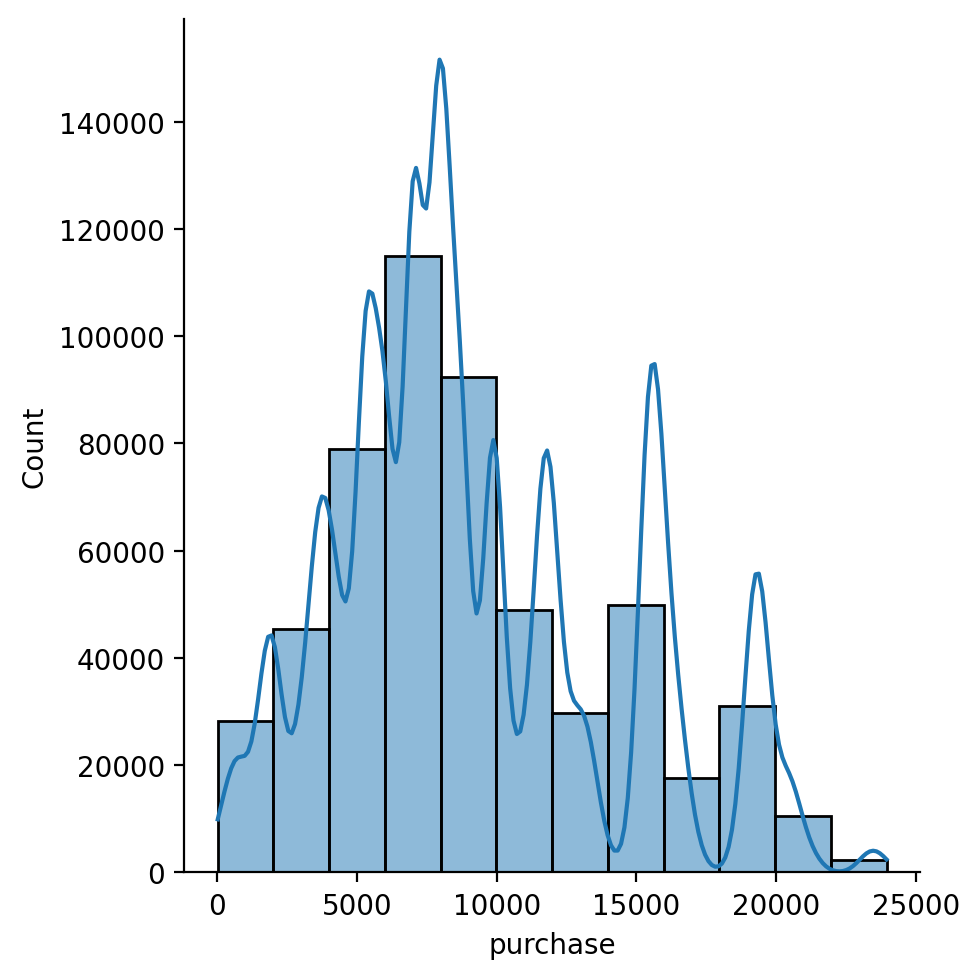

In [133]:
# Handling Outliers:
sns.displot(wm_df['purchase'], kde=True, binwidth=2000)

**Data Transformation and Feature Engineering**

- Generating New Features: New `purchase_cat` feature is generated as `category` data type and also ordered.

In [134]:
# Generating New Features:
# Generate a purchase category column
wm_df['purchase_cat'] = pd.cut(wm_df['purchase']/1000, bins=5, precision=0, right=True)
wm_df['purchase_cat'].unique()

# Order the purchase_cat column
wm_df['purchase_cat'] = wm_df['purchase_cat'].cat.rename_categories(['<=5k','6-10k','11-14k','15-19k','>=20k'])
wm_df['purchase_cat'].unique()

[(5.0, 10.0], (14.0, 19.0], (-0.0, 5.0], (19.0, 24.0], (10.0, 14.0]]
Categories (5, interval[float64, right]): [(-0.0, 5.0] < (5.0, 10.0] < (10.0, 14.0] < (14.0, 19.0] < (19.0, 24.0]]

['6-10k', '15-19k', '<=5k', '>=20k', '11-14k']
Categories (5, object): ['<=5k' < '6-10k' < '11-14k' < '15-19k' < '>=20k']

## Assertions and Validation
This acts like a test case. It should be true at any point of time, irrespective of modifications done to data.

In [135]:
# Uniformity Constraint assertions
assert wm_df['product_id'].str.startswith('P').all() == True

# Data type assertions
assert wm_df['user_id'].dtype == 'int64'
assert wm_df['product_id'].dtype == 'object'
assert wm_df['gender'].dtype == 'category'
assert wm_df['age'].dtype == 'category'
assert wm_df['occupation'].dtype == 'category'
assert wm_df['city_category'].dtype == 'category'
assert wm_df['stay_in_current_city_years'].dtype == 'category'
assert wm_df['marital_status'].dtype == 'category'
assert wm_df['product_category'].dtype == 'category'
assert wm_df['purchase'].dtype == 'int64'

# Data Range Constraints
# No -ve values in purchases
assert wm_df['purchase'].ge(1).all() == True

# Text Length Constraint
assert wm_df['product_id'].str.strip().str.len().between(8,9).all() == True # strips the string and checks to find any whitespaces values in the string

# Uniqueness Constraint
assert wm_df[['user_id','product_id']].duplicated().sum() == 0

# Cross filed validation 
# user with age 0-17 and marital status = 1 is not possible legally
assert ((wm_df['age'] == '0-17') & (wm_df['marital_status'] == 1)).all() == False

# Hierarchical validation
# same product_id can't be mapped to different product_categories
assert wm_df.groupby(['product_category', 'product_id'],observed=False)['product_id'].nunique().sum() == wm_df['product_id'].nunique()

## Final data after Data wrangling 

In [235]:
display(wm_df.head(15).style.set_table_styles(table_styles['cerulean_palette']).set_caption("Walmart Data"))
display(wm_df.describe().style.set_table_styles(table_styles['cerulean_palette']).set_caption("Walmart Data Summary Statistics"))
wm_df.info()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase,purchase_cat
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,6-10k
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15-19k
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,<=5k
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,<=5k
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,6-10k
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227,15-19k
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,>=20k
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,15-19k
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,15-19k
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,6-10k


,user_id,purchase
count,550068.000000,550068.000000
mean,1003028.842401,9263.968713
std,1727.591586,5023.065394
min,1000001.000000,12.000000
25%,1001516.000000,5823.000000
50%,1003077.000000,8047.000000
75%,1004478.000000,12054.000000
max,1006040.000000,23961.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   user_id                     550068 non-null  int64   
 1   product_id                  550068 non-null  object  
 2   gender                      550068 non-null  category
 3   age                         550068 non-null  category
 4   occupation                  550068 non-null  category
 5   city_category               550068 non-null  category
 6   stay_in_current_city_years  550068 non-null  category
 7   marital_status              550068 non-null  category
 8   product_category            550068 non-null  category
 9   purchase                    550068 non-null  int64   
 10  purchase_cat                550068 non-null  category
dtypes: category(8), int64(2), object(1)
memory usage: 16.8+ MB


# Visualisation and Exploration

**Categorical Variables**
* About 3/4 customer are male and 1/4 are female with same ratio in purchase amount as well
* Higher average order value show increase in purchasing power due to higher disposable income
* Average order value of female is comparatively less to male (703 value) in general
* Age wise 
    * Average order value increasing with age for both male and female
    * In '26-35' age both value and count of purchase is lowest for females
    * Men has higher average order value in the initial stages of life compared to female but this get reduced as they get older
* Occupation wise
    * Occupation code '0', '1' and '4' has highest purchase amount
    * Occupation code '14' has the highest average order value
    * Occupation code '9' females are purchasing much more low value items than males 
    * Average order value for females in Occupation code '18' is much higher than males
* City Wise
    * Total purchase is highest in city B 
    * City A has comparatively less difference in average order value for males and females 
* Years in the city wise
    * Both male and females buy most in the 1st year
* Marital Status wise
    * Marriage reduced average purchase value for men while increased for women (**interesting**)
* Product category wise
    * Product '1', '5', and '8' contribute to most of the sales 
    * Product '10' has highest average purchase value
    * Product '14' higher average purchase value for women but not for men

/tmp/ipykernel_346777/1773575626.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wm_df_grouped = wm_df.groupby(['gender']).agg(total_purchase_in_millions=('purchase', 'sum'),


,gender,total_purchase_in_millions,total_count_in_millions,average_order_value
0,M,"3,909.58",0.414,"9,437.53"
1,F,"1,186.23",0.136,"8,734.57"


/tmp/ipykernel_346777/1773575626.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wm_df_grouped = wm_df.groupby(['gender',col]).agg(total_purchase_in_millions=('purchase', 'sum'),


<Axes: xlabel='total_purchase_in_millions', ylabel='age'>

<Axes: xlabel='average_order_value', ylabel='age'>

[]

/tmp/ipykernel_346777/1773575626.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wm_df_grouped = wm_df.groupby(['gender',col]).agg(total_purchase_in_millions=('purchase', 'sum'),


<Axes: xlabel='total_purchase_in_millions', ylabel='occupation'>

<Axes: xlabel='average_order_value', ylabel='occupation'>

[]

/tmp/ipykernel_346777/1773575626.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wm_df_grouped = wm_df.groupby(['gender',col]).agg(total_purchase_in_millions=('purchase', 'sum'),


<Axes: xlabel='total_purchase_in_millions', ylabel='city_category'>

<Axes: xlabel='average_order_value', ylabel='city_category'>

[]

/tmp/ipykernel_346777/1773575626.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wm_df_grouped = wm_df.groupby(['gender',col]).agg(total_purchase_in_millions=('purchase', 'sum'),


<Axes: xlabel='total_purchase_in_millions', ylabel='stay_in_current_city_years'>

<Axes: xlabel='average_order_value', ylabel='stay_in_current_city_years'>

[]

/tmp/ipykernel_346777/1773575626.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wm_df_grouped = wm_df.groupby(['gender',col]).agg(total_purchase_in_millions=('purchase', 'sum'),


<Axes: xlabel='total_purchase_in_millions', ylabel='marital_status'>

<Axes: xlabel='average_order_value', ylabel='marital_status'>

[]

/tmp/ipykernel_346777/1773575626.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wm_df_grouped = wm_df.groupby(['gender',col]).agg(total_purchase_in_millions=('purchase', 'sum'),


<Axes: xlabel='total_purchase_in_millions', ylabel='product_category'>

<Axes: xlabel='average_order_value', ylabel='product_category'>

[]

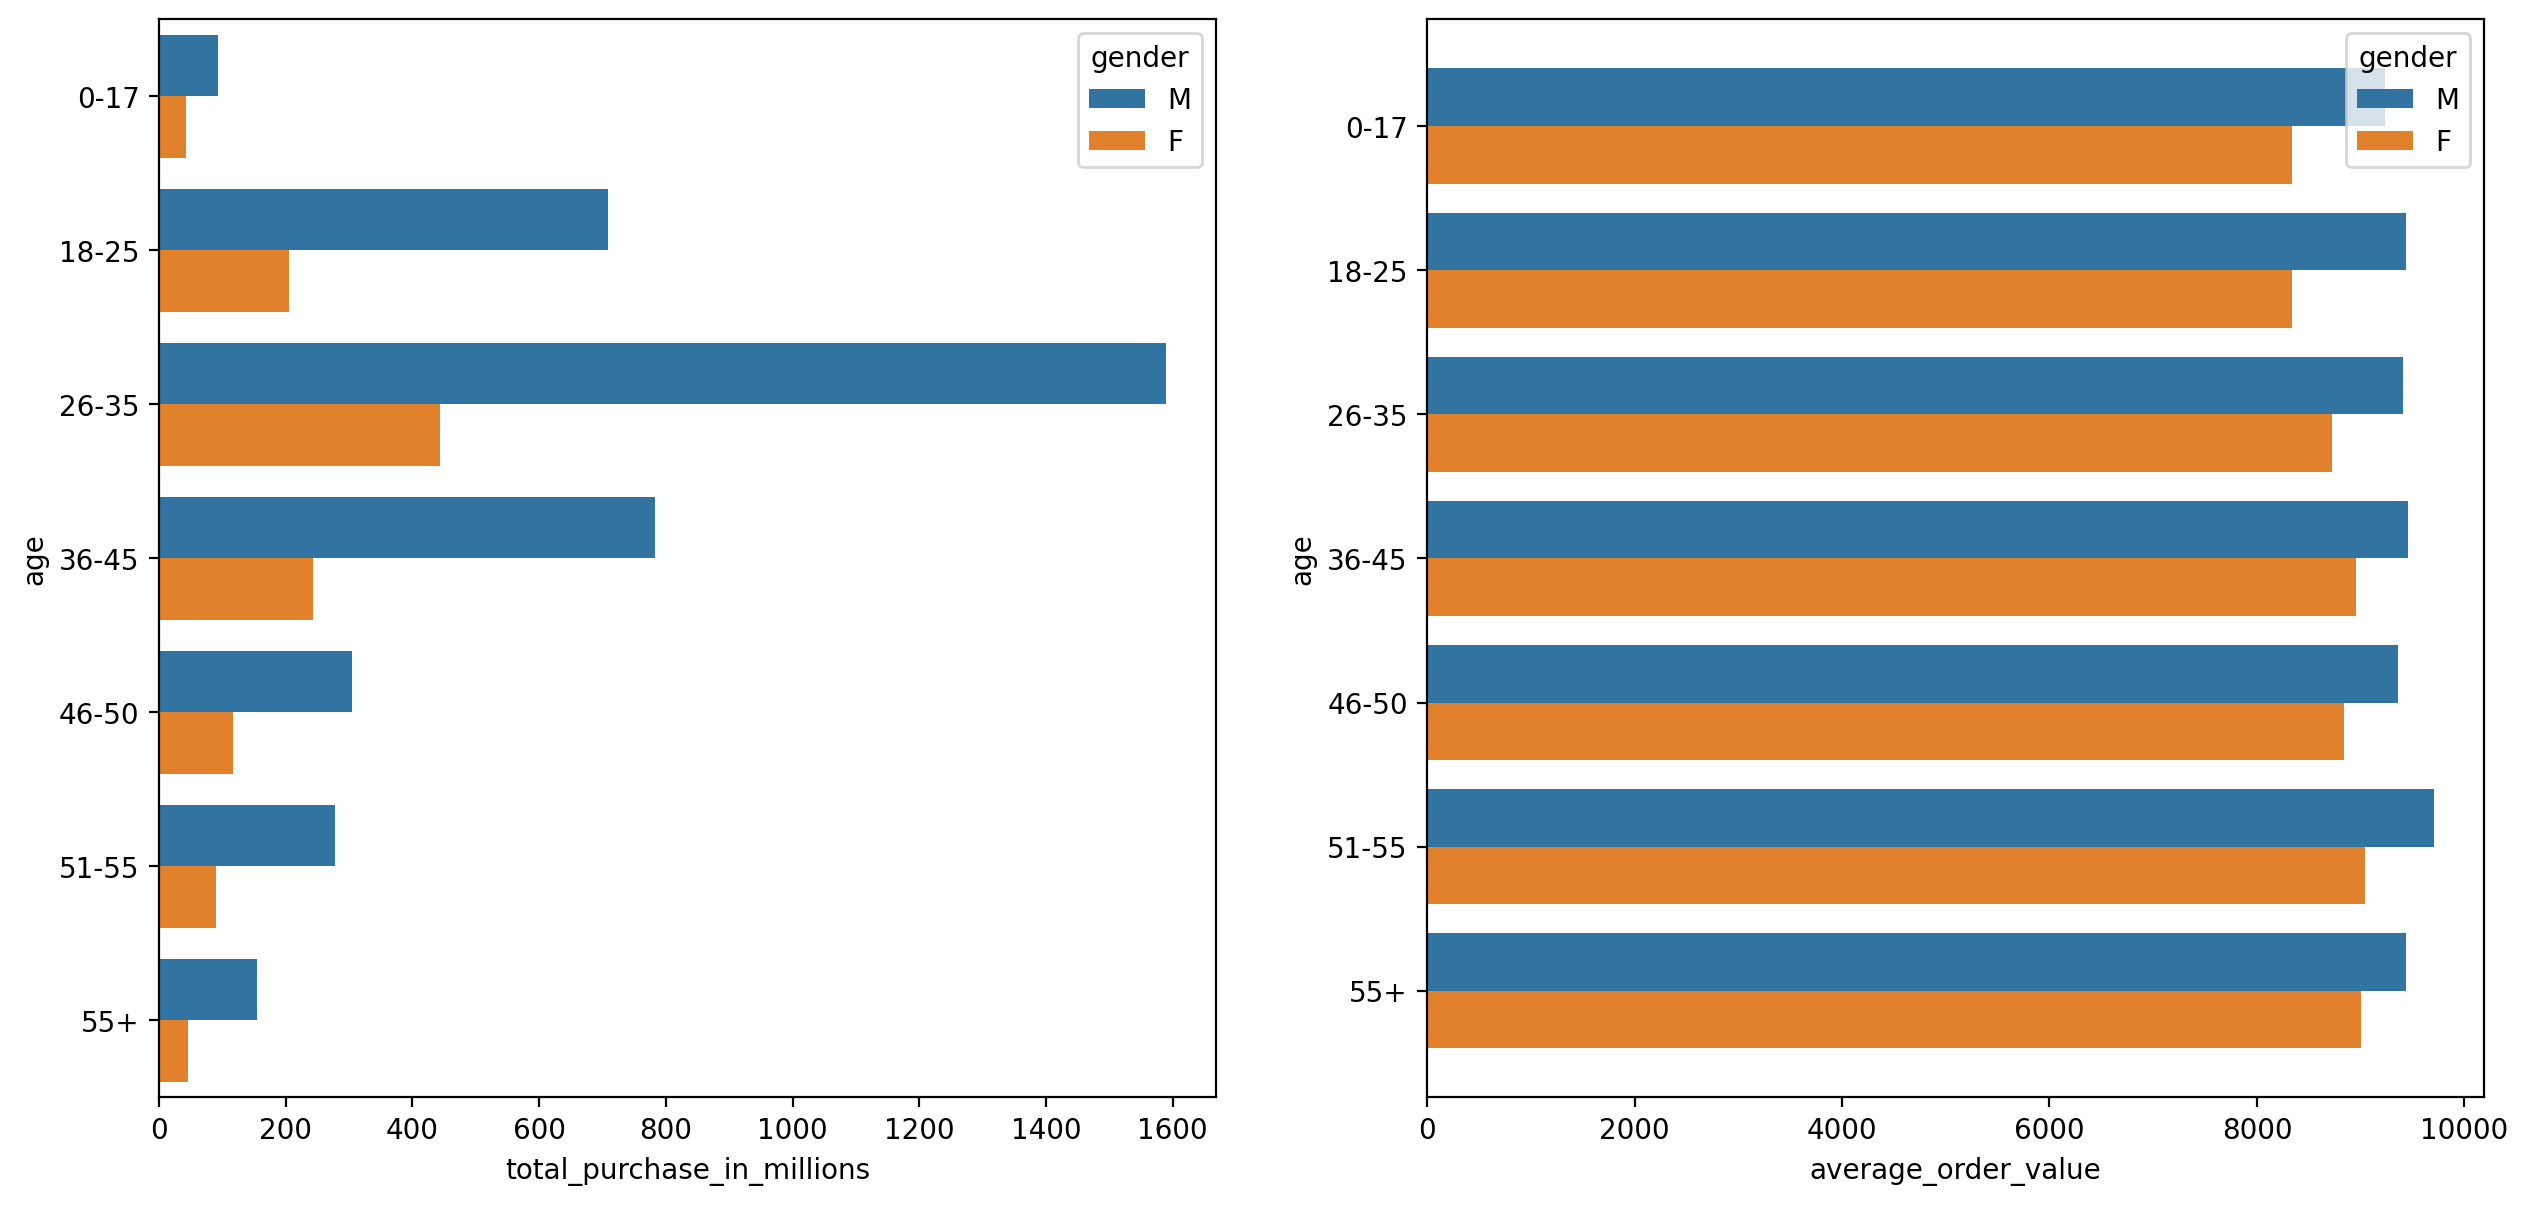

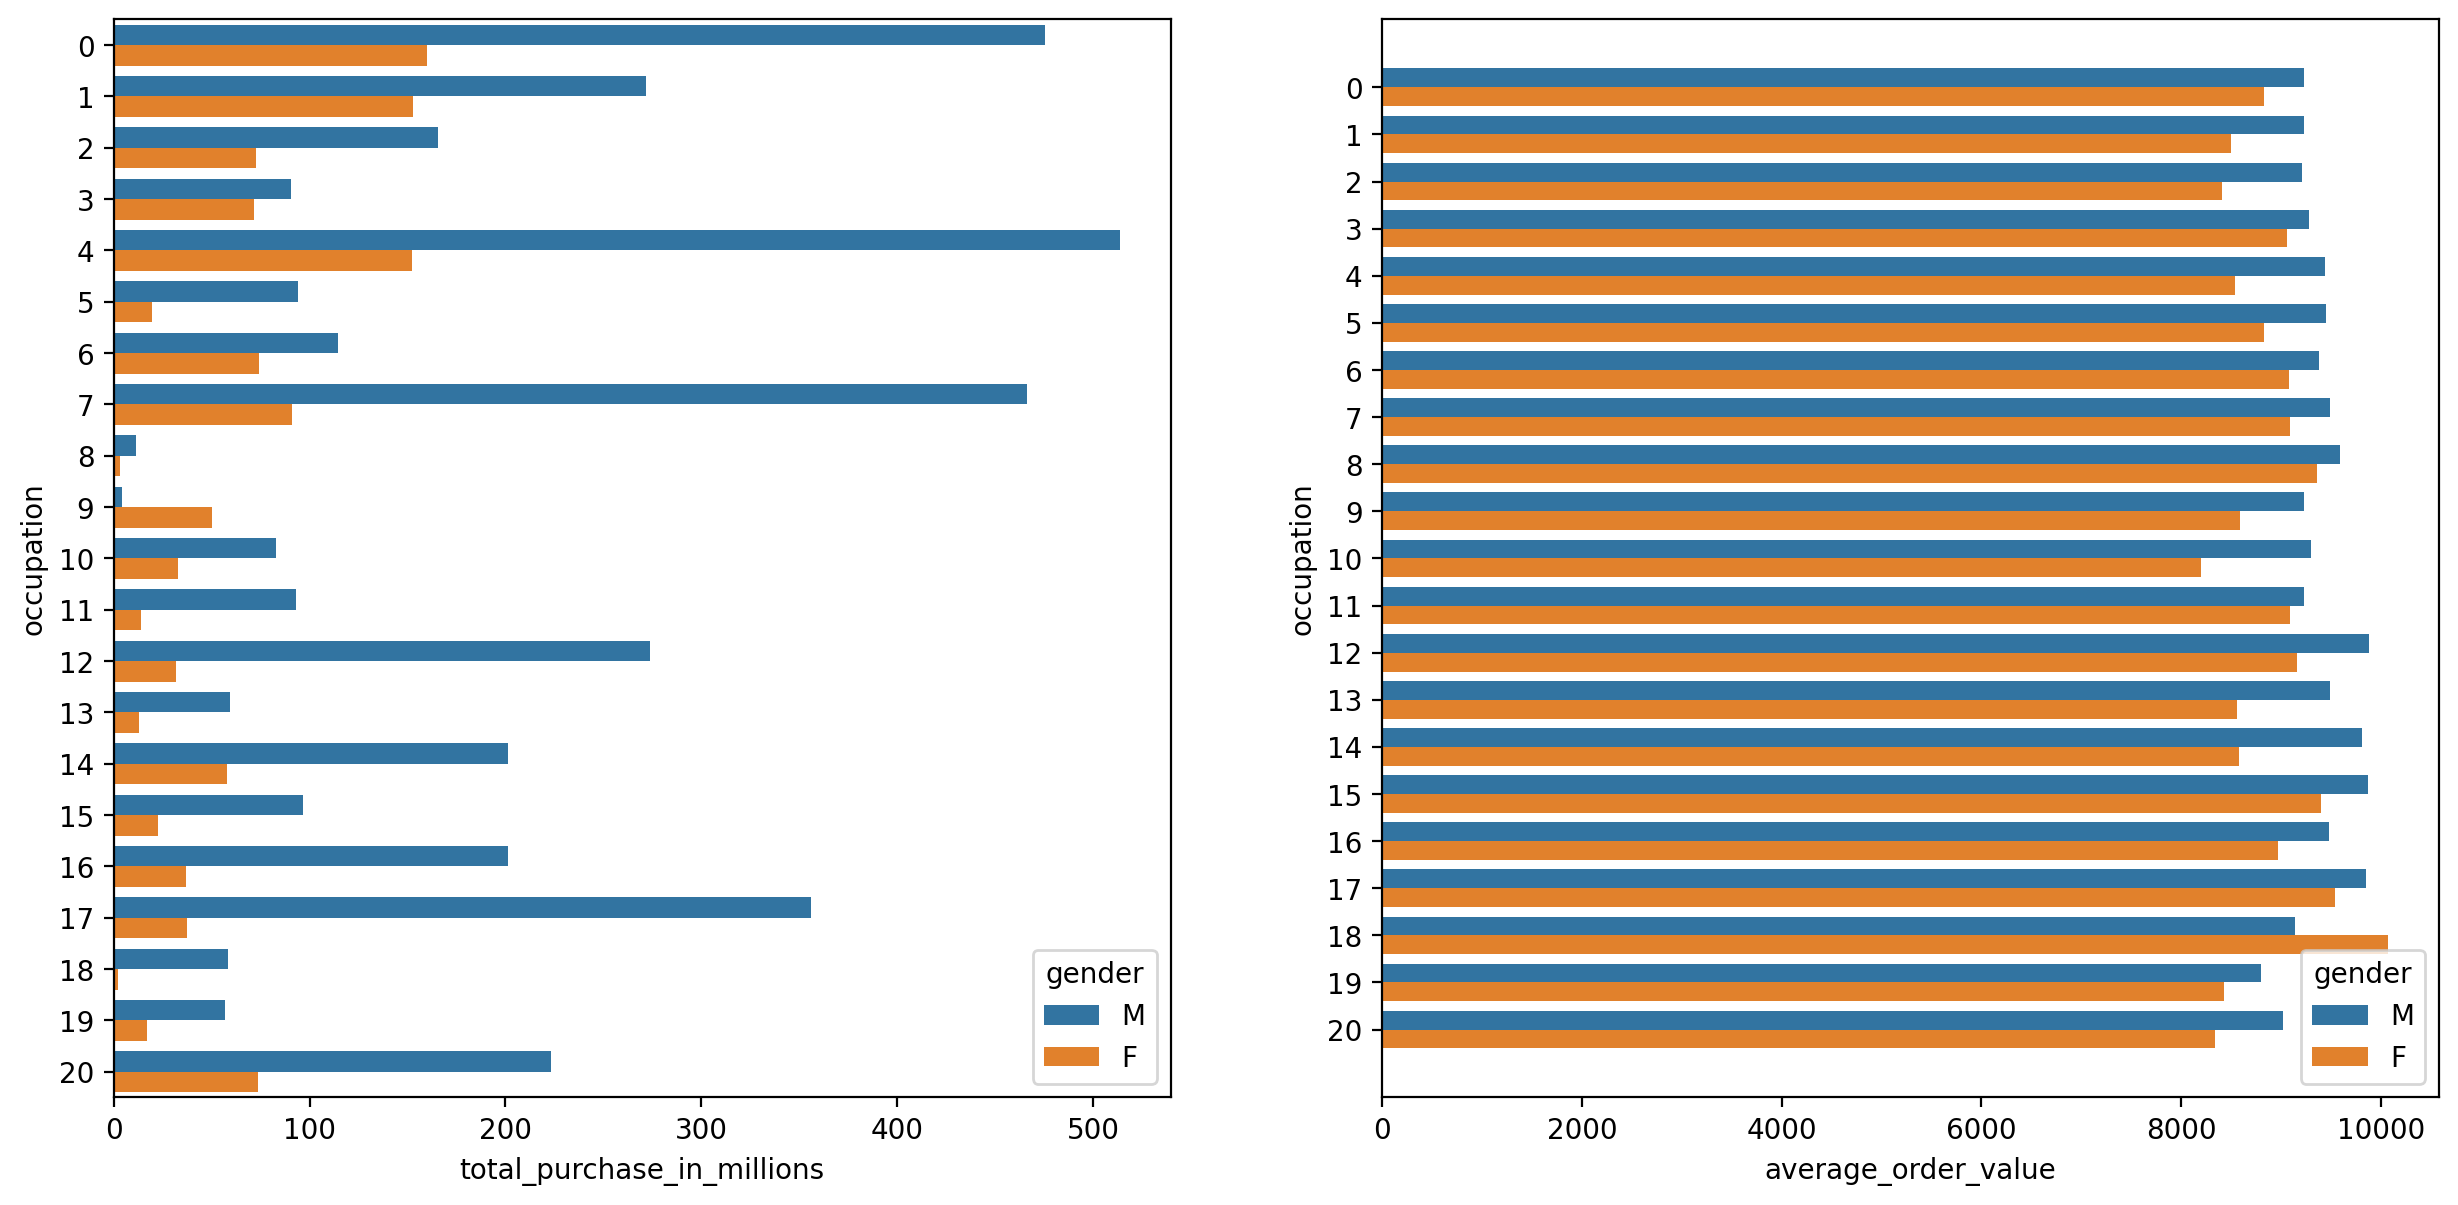

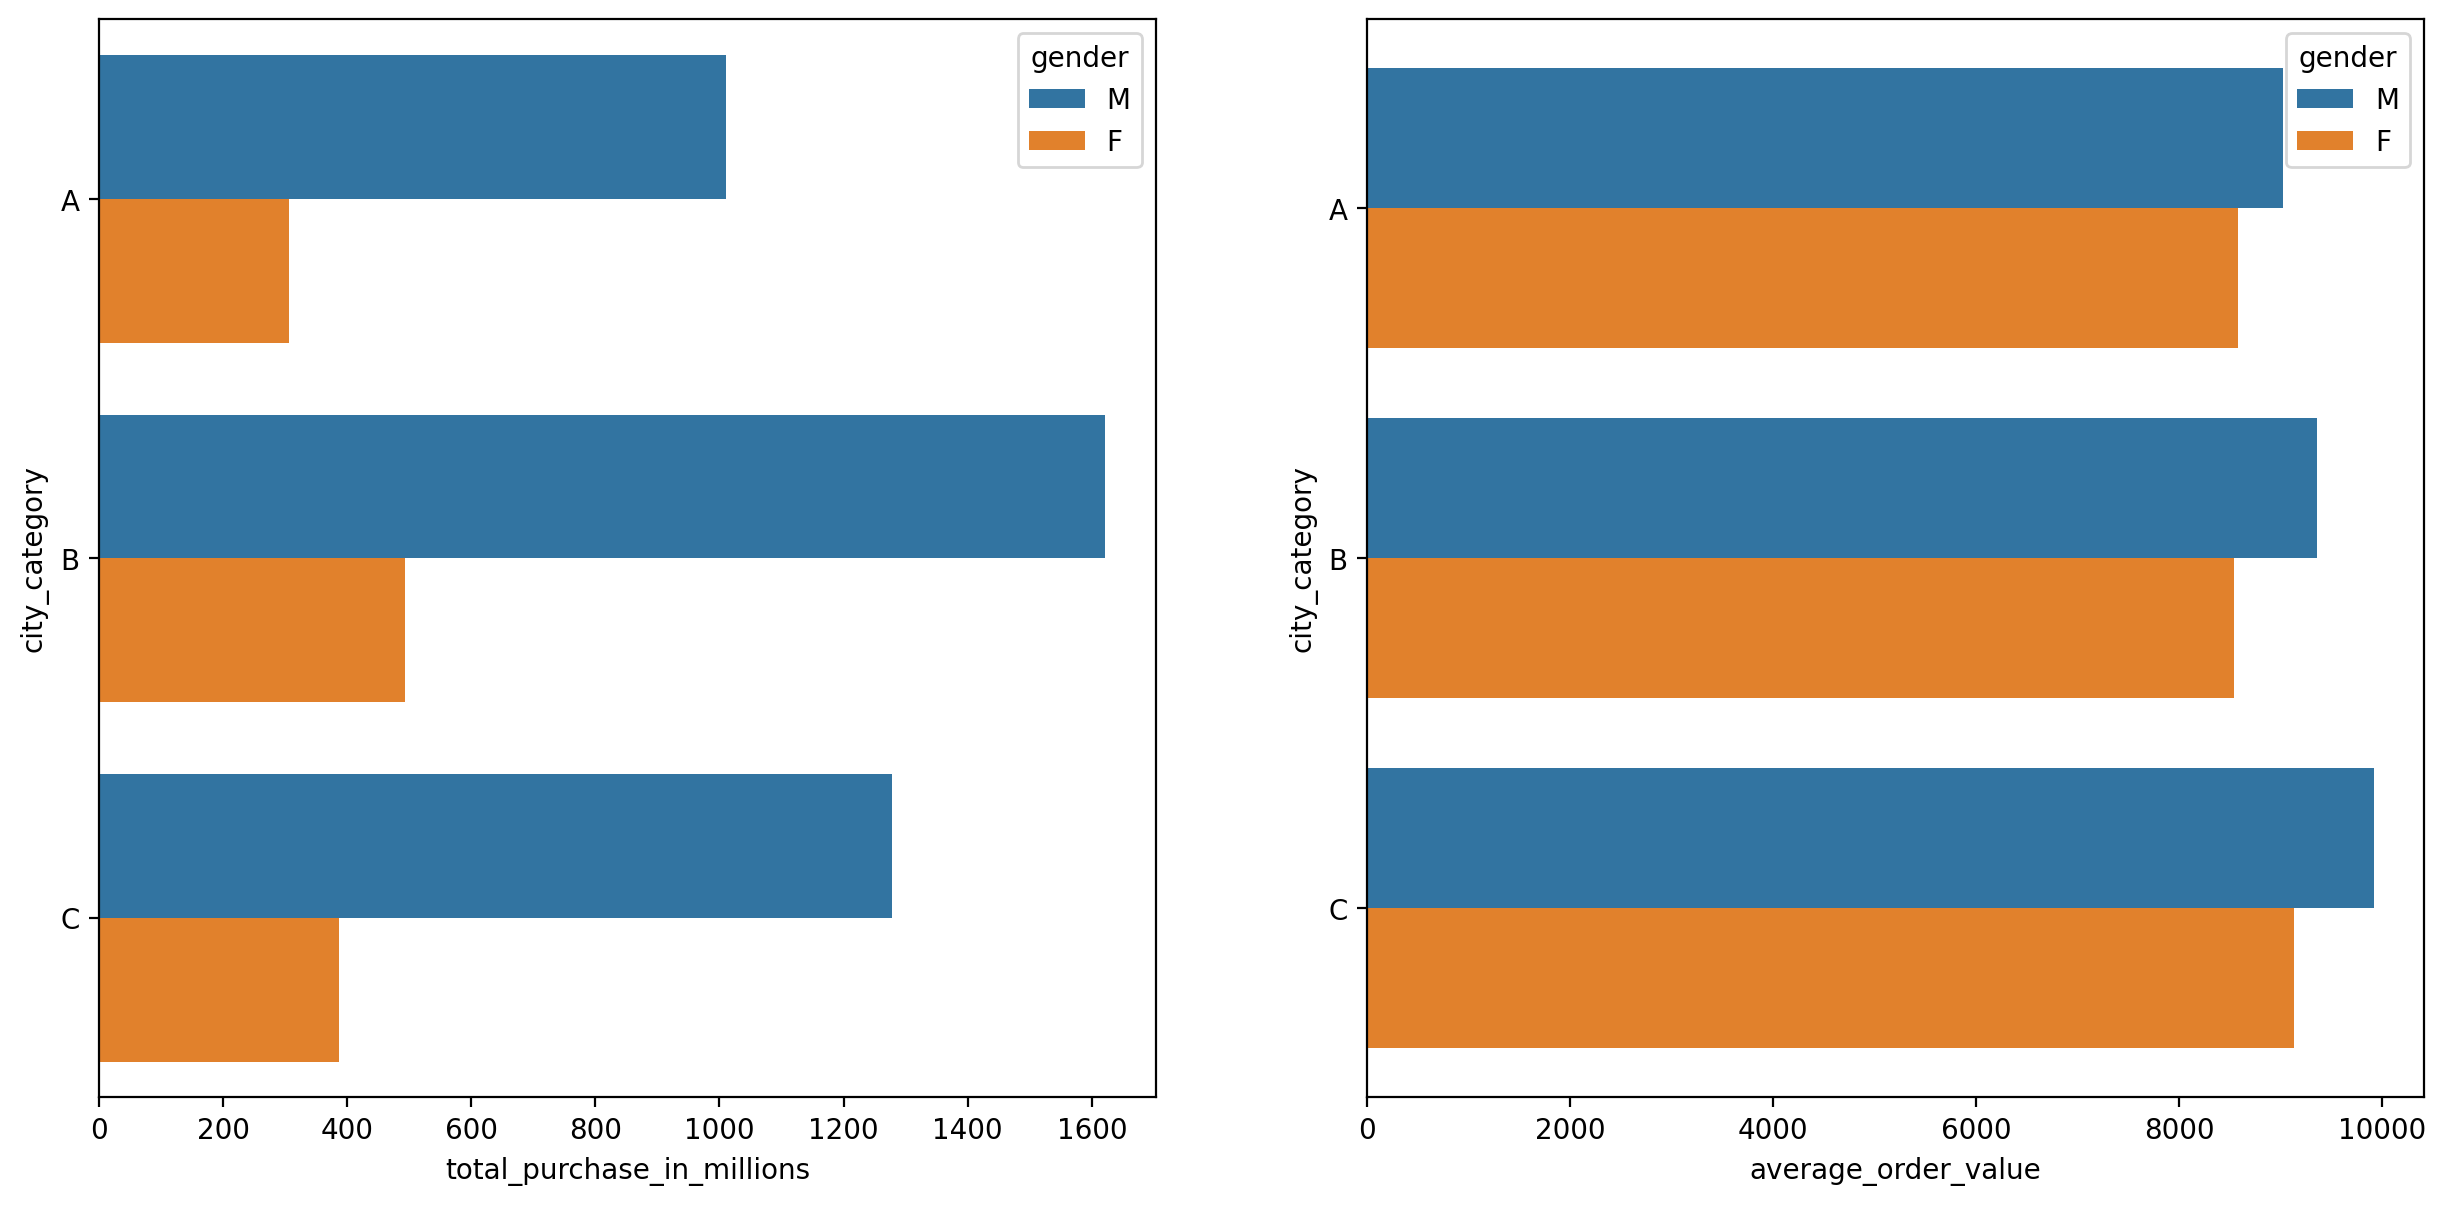

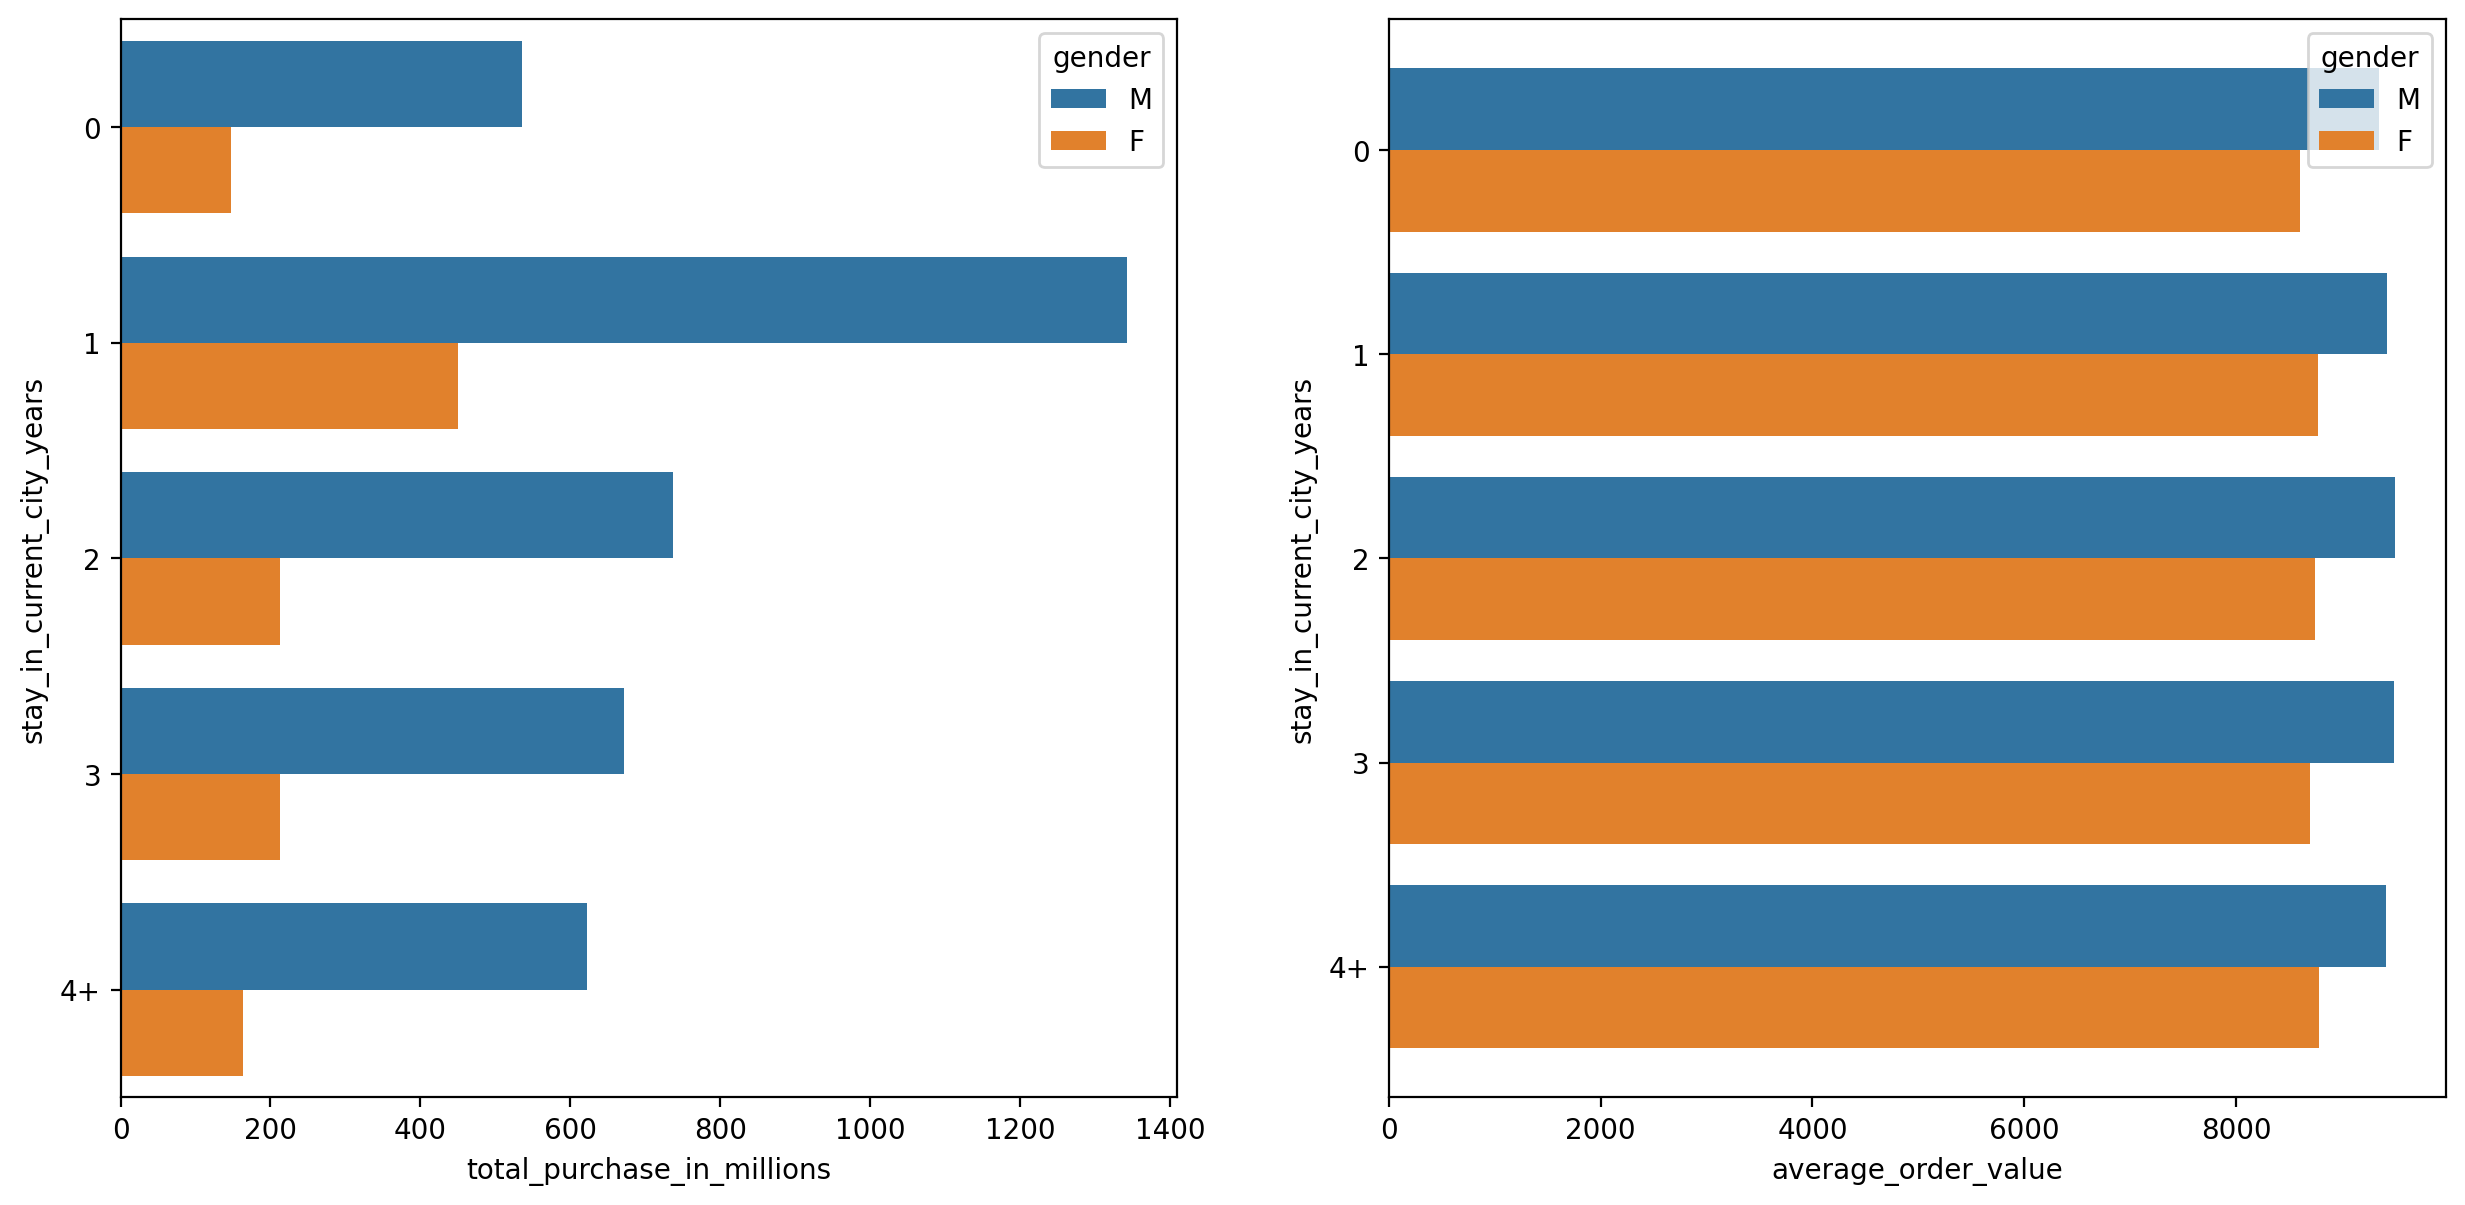

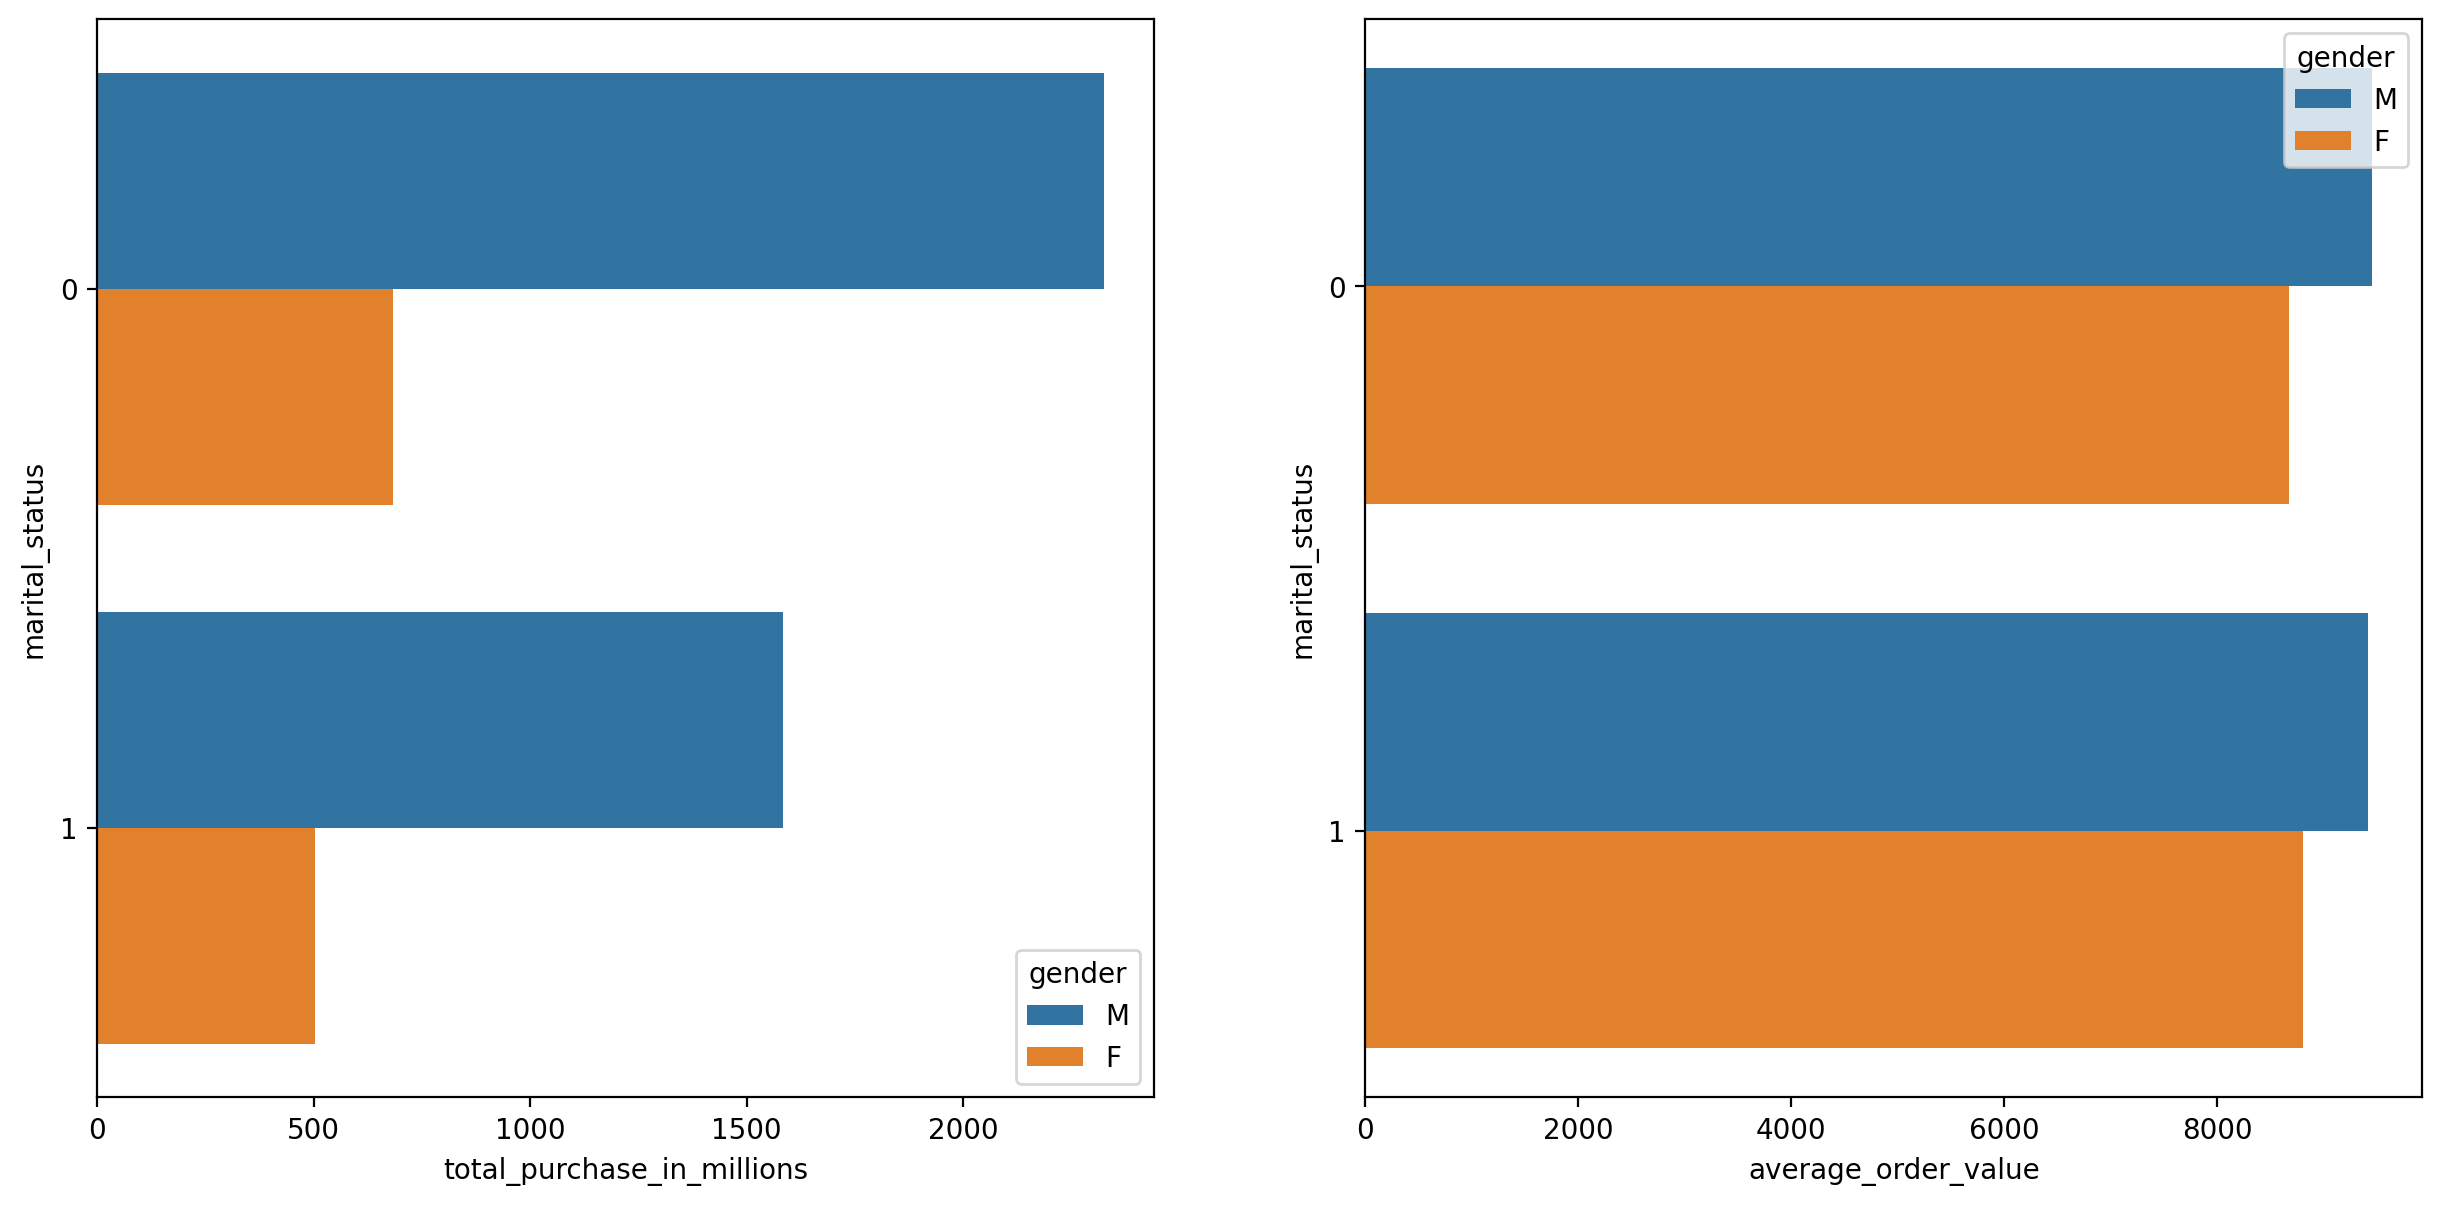

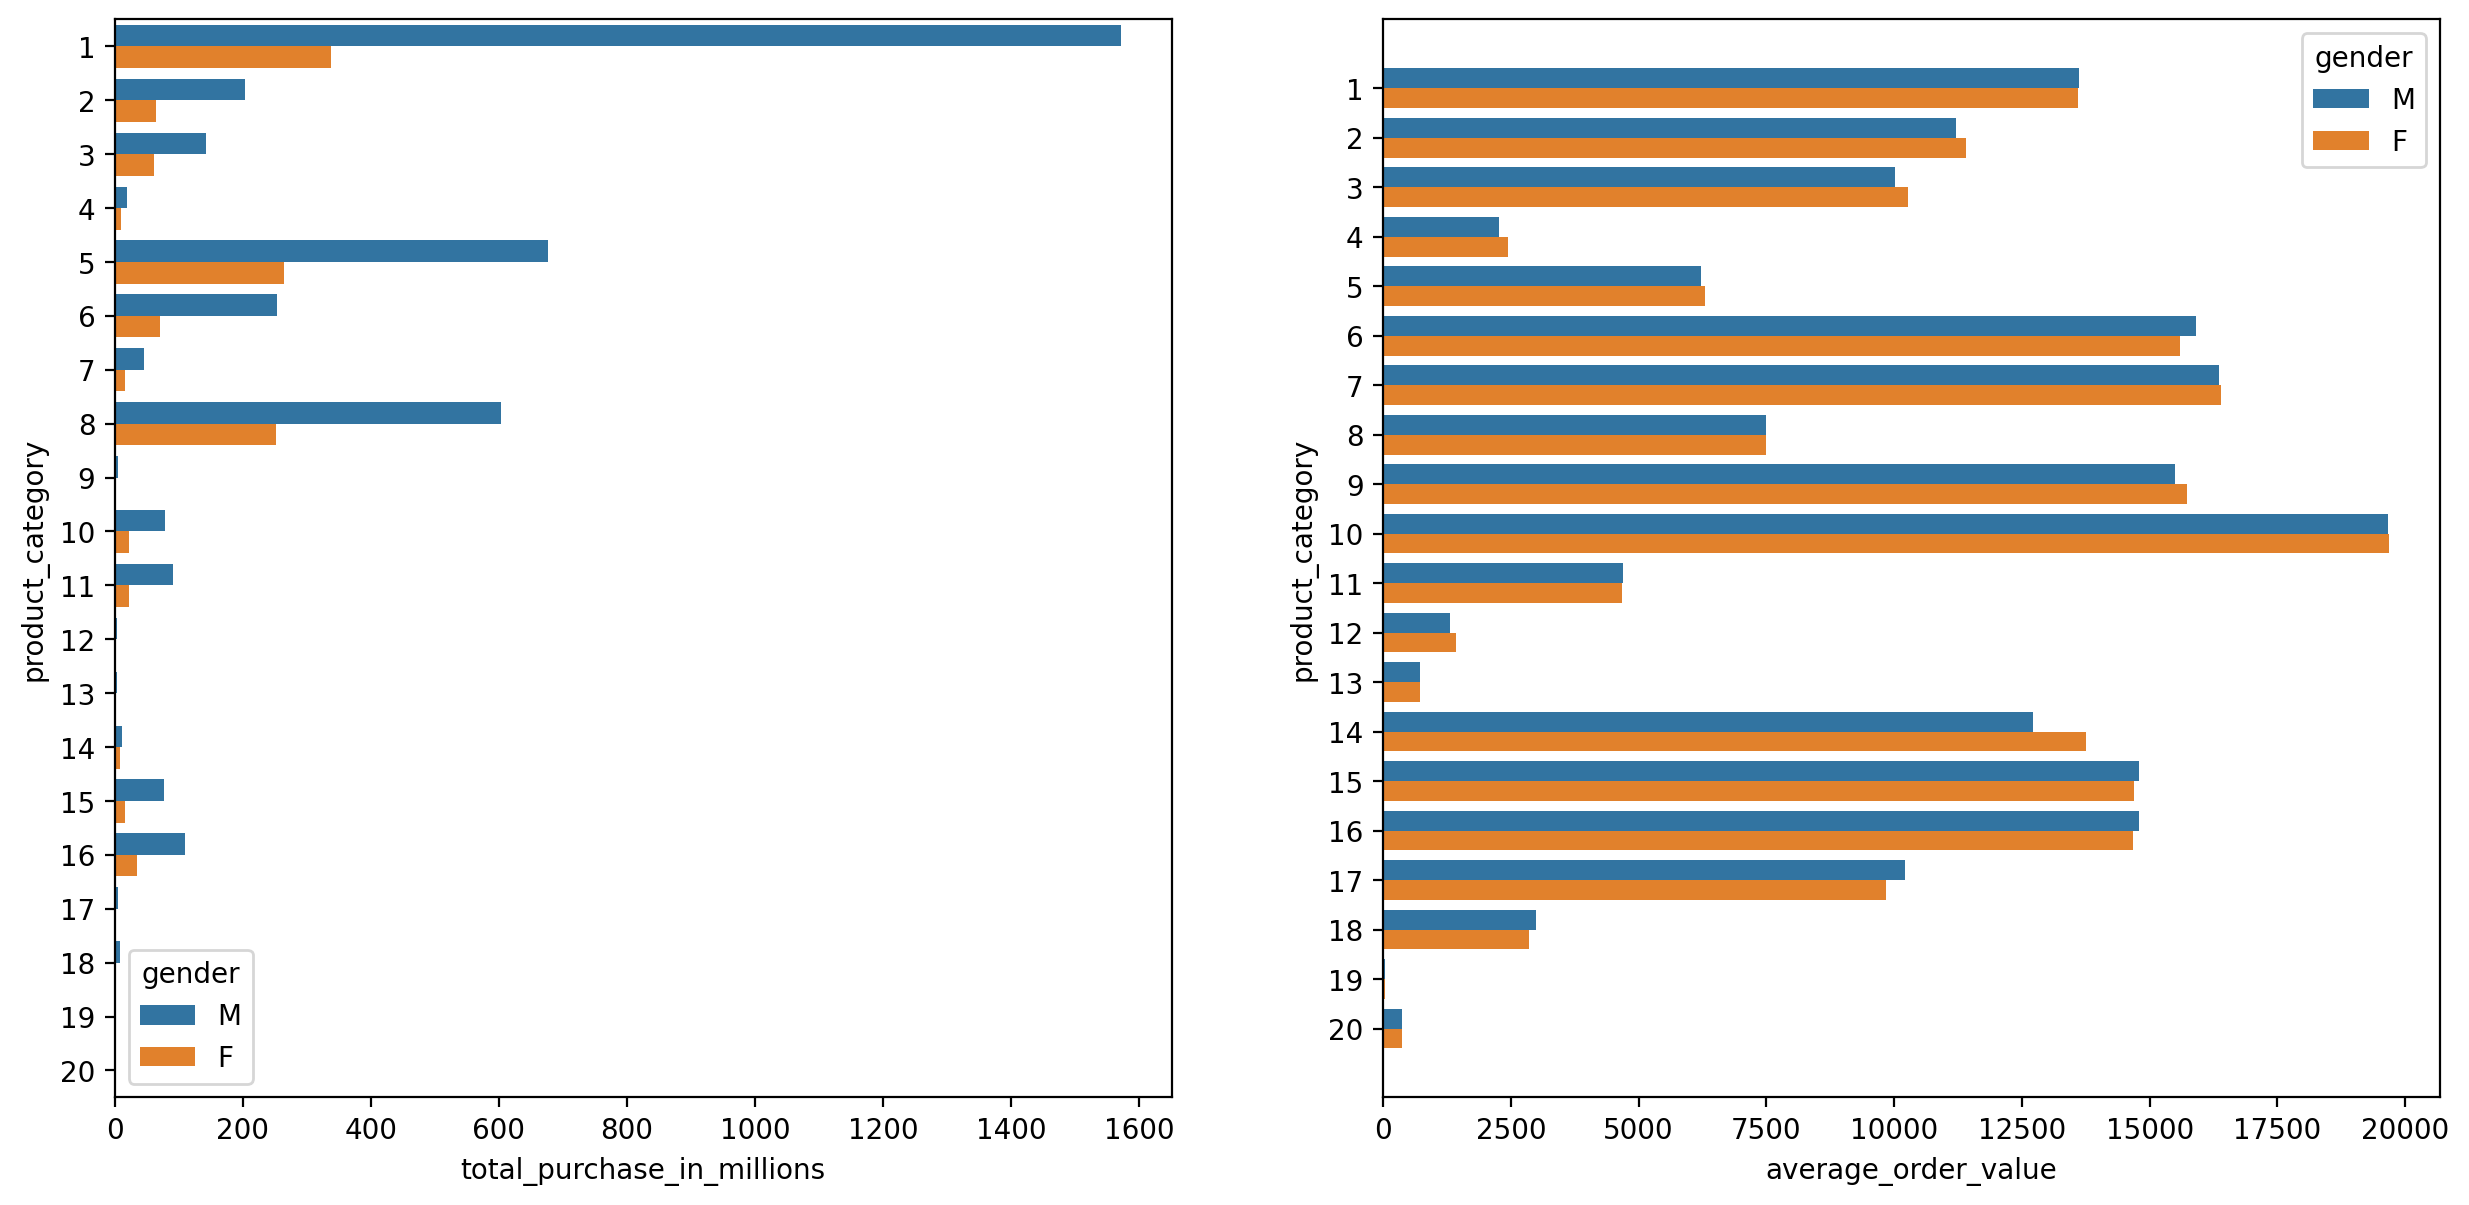

In [280]:
# Table visualization (this acts like a catplot as well)

# male vs female purchase
wm_df_grouped = wm_df.groupby(['gender']).agg(total_purchase_in_millions=('purchase', 'sum'), 
                                        total_count_in_millions=('user_id', 'count'))/1000000
wm_df_grouped = wm_df_grouped.reset_index()
wm_df_grouped['average_order_value'] = wm_df_grouped['total_purchase_in_millions']/wm_df_grouped['total_count_in_millions']
display(wm_df_grouped.style.set_table_styles(table_styles['cerulean_palette'])
        .format({'total_purchase_in_millions':'{:,.2f}',
                'total_count_in_millions':'{:,.3f}',
                'average_order_value':'{:,.2f}'})
        .bar(color='#47FDD2AE')
        .set_caption(f'Gender split for purchase in millions'))

# For each column male vs female purchase details
for col in wm_df.select_dtypes('category').columns:
    if col in ['purchase_cat','gender']: continue
    wm_df_grouped = wm_df.groupby(['gender',col]).agg(total_purchase_in_millions=('purchase', 'sum'), 
                                             total_count_in_millions=('user_id', 'count'))/1000000
    wm_df_grouped = wm_df_grouped.reset_index()
    wm_df_grouped['average_order_value'] = wm_df_grouped['total_purchase_in_millions']/wm_df_grouped['total_count_in_millions']
    
    # plotting
    fig, axes = plt.subplots(1, 2,figsize=(15, 7))
    sns.barplot(y=col, x='total_purchase_in_millions', hue='gender', data=wm_df_grouped, ax=axes[0])
    sns.barplot(y=col, x='average_order_value', hue='gender', data=wm_df_grouped, ax=axes[1])
    plt.plot()
    
    wm_df_grouped = wm_df_grouped.pivot(columns='gender',values=['total_purchase_in_millions','total_count_in_millions','average_order_value'],index=col)
    wm_df_grouped[('total_purchase_in_millions','delta (M-F)')] = wm_df_grouped[('total_purchase_in_millions','M')] - wm_df_grouped[('total_purchase_in_millions','F')]
    wm_df_grouped[('total_count_in_millions','delta (M-F)')] = wm_df_grouped[('total_count_in_millions','M')] - wm_df_grouped[('total_count_in_millions','F')]
    wm_df_grouped[('average_order_value','delta (M-F)')] = wm_df_grouped[('average_order_value','M')] - wm_df_grouped[('average_order_value','F')]
    # table style and caption
    display(wm_df_grouped.style.set_table_styles(table_styles['cerulean_palette'])
            .bar(color='#47FDD2AE')
            .set_caption(f'{col.title()} split for purchase in millions'))